In [3]:
# import required libraries
import pandas as pd
import numpy as np

import sklearn as scikit
import matplotlib.pyplot as pyplot

In [9]:
# read csv "data/inputs/Carbon Emissions by Country/Carbon_(CO2)_Emissions_by_Country.csv"

df = pd.read_csv('data/inputs/Carbon Emissions by Country/Carbon_(CO2)_Emissions_by_Country.csv')

print(df)

          Country  Region        Date  Kilotons of Co2  Metric Tons Per Capita
0     Afghanistan    Asia  01-01-2011           8930.0                    0.31
1     Afghanistan    Asia  01-01-2012           8080.0                    0.27
2     Afghanistan    Asia  01-01-2010           7110.0                    0.25
3     Afghanistan    Asia  01-01-2019           6080.0                    0.16
4     Afghanistan    Asia  01-01-2018           6070.0                    0.17
...           ...     ...         ...              ...                     ...
5672     Zimbabwe  Africa  01-01-2004           9770.0                    0.80
5673     Zimbabwe  Africa  01-01-2007           9760.0                    0.78
5674     Zimbabwe  Africa  01-01-2010           9600.0                    0.75
5675     Zimbabwe  Africa  01-01-2009           7750.0                    0.61
5676     Zimbabwe  Africa  01-01-2008           7600.0                    0.61

[5677 rows x 5 columns]


In [13]:
# read in csv 

df2 = pd.read_csv('data/inputs/US Carbon Emissions by State/CO2_Emissions_US.csv')

print(df2)

       year state-name                                      sector-name  \
0      1970    Alabama              Industrial carbon dioxide emissions   
1      1970    Alabama              Industrial carbon dioxide emissions   
2      1970    Alabama              Industrial carbon dioxide emissions   
3      1970    Alabama              Industrial carbon dioxide emissions   
4      1970    Alabama  Total carbon dioxide emissions from all sectors   
...     ...        ...                                              ...   
59896  2021    Wyoming              Commercial carbon dioxide emissions   
59897  2021    Wyoming             Residential carbon dioxide emissions   
59898  2021    Wyoming             Residential carbon dioxide emissions   
59899  2021    Wyoming             Residential carbon dioxide emissions   
59900  2021    Wyoming  Total carbon dioxide emissions from all sectors   

         fuel-name       value  
0             Coal   26.721507  
1        Petroleum    3.577779  


In [31]:
# Data preparation for joining.

df = df[df["Country"] == 'United States']
df['Year'] = df.apply(lambda x: pd.Series(pd.to_datetime(x[2]).year), axis = 1)
ce_global_filter = df.filter(items=['Country', 'Year', 'Kilotons of Co2', 'Metric Tons Per Capita'])
print(ce_global_filter)

            Country  Year  Kilotons of Co2  Metric Tons Per Capita
5407  United States  2000       5775810.00                   20.47
5408  United States  2005       5753490.23                   19.47
5409  United States  2001       5748260.00                   20.17
5410  United States  2004       5738290.04                   19.60
5411  United States  2007       5736319.82                   19.04
5412  United States  2003       5658990.23                   19.51
5413  United States  2006       5653080.08                   18.95
5414  United States  1999       5609020.00                   20.10
5415  United States  2002       5593029.79                   19.45
5416  United States  1998       5590540.00                   20.27
5417  United States  2008       5558379.88                   18.28
5418  United States  1997       5543350.00                   20.33
5419  United States  2010       5392109.86                   17.43
5420  United States  1996       5273490.00                   1

C:\Users\grego\AppData\Local\Temp\ipykernel_25328\80242589.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Year'] = df.apply(lambda x: pd.Series(pd.to_datetime(x[2]).year), axis = 1)


In [33]:
# join data sets

combined_df = ce_global_filter.merge(df2, left_on='Year', right_on='year')

print(combined_df)


             Country  Year  Kilotons of Co2  Metric Tons Per Capita  year  \
0      United States  2000        5775810.0                   20.47  2000   
1      United States  2000        5775810.0                   20.47  2000   
2      United States  2000        5775810.0                   20.47  2000   
3      United States  2000        5775810.0                   20.47  2000   
4      United States  2000        5775810.0                   20.47  2000   
...              ...   ...              ...                     ...   ...   
34213  United States  1991        4807500.0                   19.00  1991   
34214  United States  1991        4807500.0                   19.00  1991   
34215  United States  1991        4807500.0                   19.00  1991   
34216  United States  1991        4807500.0                   19.00  1991   
34217  United States  1991        4807500.0                   19.00  1991   

      state-name                                      sector-name  \
0     

In [34]:
#rename column

combined_df = combined_df.rename(columns={ 'value': 'Million Metric Tons' })

# lists containing values for dependent and independent variables

dep_var_1 = combined_df['Kilotons of Co2']
ind_var_1 = combined_df['Metric Tons Per Capita']
ind_var_2 = combined_df['Million Metric Tons']


print(dep_var_1)
print(ind_var_1)
print(ind_var_2)

0        5775810.0
1        5775810.0
2        5775810.0
3        5775810.0
4        5775810.0
           ...    
34213    4807500.0
34214    4807500.0
34215    4807500.0
34216    4807500.0
34217    4807500.0
Name: Kilotons of Co2, Length: 34218, dtype: float64
0        20.47
1        20.47
2        20.47
3        20.47
4        20.47
         ...  
34213    19.00
34214    19.00
34215    19.00
34216    19.00
34217    19.00
Name: Metric Tons Per Capita, Length: 34218, dtype: float64
0          0.014109
1         18.997993
2         85.908083
3        142.298577
4         25.287666
            ...    
34213      9.717897
34214     55.495746
34215     42.912113
34216      7.288282
34217      5.295350
Name: Million Metric Tons, Length: 34218, dtype: float64


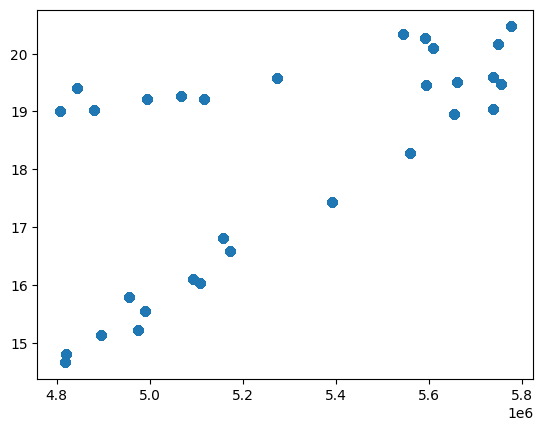

In [36]:
# visualize relationship between Kilotons of CO2 and Metric Tons Per Capita

pygraph_1 = pyplot.scatter(dep_var_1, ind_var_1)

pygraph_1

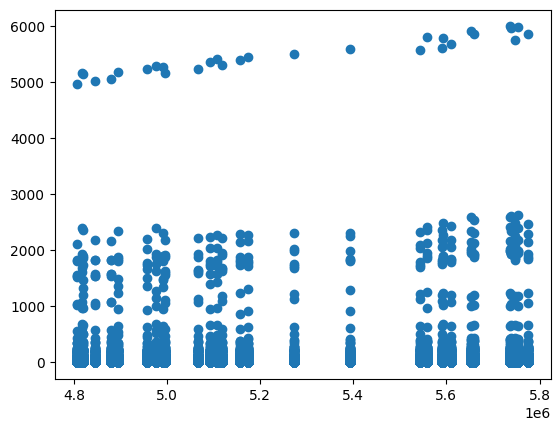

In [37]:
# visualize relationship between Kilotons of CO2 and Million Metric Tons

pygraph_2 = pyplot.scatter(dep_var_1, ind_var_2)

pygraph_2